In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("test.csv")

In [ ]:
print(train.shape,test.shape)

In [ ]:
train.head()

In [ ]:
del train["Product_id"]
del train["Customer_name"]

In [ ]:
train.isnull().sum()

Stall_no              5
instock_date          0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6363 non-null   float64
 1   instock_date      6368 non-null   object 
 2   Market_Category   6368 non-null   int64  
 3   Loyalty_customer  6368 non-null   object 
 4   Product_Category  6368 non-null   object 
 5   Grade             6368 non-null   int64  
 6   Demand            6368 non-null   int64  
 7   Discount_avail    6330 non-null   float64
 8   charges_1         6170 non-null   float64
 9   charges_2 (%)     6163 non-null   float64
 10  Minimum_price     6330 non-null   float64
 11  Maximum_price     6025 non-null   float64
 12  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 646.9+ KB


In [ ]:
#train[train['Selling_Price'] < 0]

In [ ]:
#train[train['Selling_Price'].isnull()]

In [ ]:
train = train.dropna(subset = ['Selling_Price'])

In [ ]:
train.drop(train[train['Selling_Price'] < 0].index, inplace=True)

In [ ]:
print(train.shape)

(6313, 13)


In [ ]:
#Conerting categorical variable to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train["Loyalty_customer"] = le.fit_transform(train["Loyalty_customer"])

In [ ]:
train["Stall_no"].value_counts()

In [ ]:
train["Stall_no"].fillna(13.0 , inplace=True)

In [ ]:
train["Discount_avail"].value_counts()

0.0    5396
1.0     880
Name: Discount_avail, dtype: int64

In [ ]:
train["Discount_avail"].fillna(0.0 , inplace=True)

In [ ]:
train[train["charges_1"].isnull()].head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
16,14.0,2015-09-24 16:28:03.000,1,0,Fashion,0,74,0.0,NaN,11.0,786.0,NaN,2582.860500
33,17.0,2015-08-19 21:08:45.000,101,0,Repair,0,19,0.0,NaN,9.0,950.0,1580.0,1563.983586
76,7.0,2015-05-09 17:19:45.000,358,1,Cosmetics,3,31,0.0,NaN,NaN,9483.0,13644.0,11761.213275
106,30.0,2015-09-22 17:22:59.000,451,1,Fashion,0,53,0.0,NaN,17.0,4627.0,NaN,5512.304016
182,39.0,2015-11-20 05:56:33.000,70,0,Fashion,2,98,0.0,NaN,16.0,3225.0,5287.0,4592.708736


In [ ]:
train["charges_1"] = train["charges_1"].fillna(train.groupby(['Product_Category','Discount_avail'])['charges_1'].transform('mean')) 
train["charges_2 (%)"] = train["charges_2 (%)"].fillna(train.groupby(['Product_Category','Discount_avail'])['charges_2 (%)'].transform('mean')) 

In [ ]:
train["Minimum_price"].fillna( train["Minimum_price"].mean() , inplace = True )
train["Maximum_price"].fillna( train["Maximum_price"].mean() , inplace = True )

In [ ]:
train.isnull().sum()

Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [ ]:
df1 = train.groupby(['Stall_no','Loyalty_customer'])['Selling_Price'].mean()
df1.head()

Stall_no  Loyalty_customer
1.0       0                   4104.359970
          1                   4831.023888
2.0       0                   3707.598332
          1                   4515.101862
3.0       0                   4758.403652
Name: Selling_Price, dtype: float64

In [ ]:
df1=df1.reset_index()
df1=df1.rename(columns={'Selling_Price':'Stall_loyalty_mean'})
df1.head()

,Stall_no,Loyalty_customer,Stall_loyalty_mean
0,1.0,0,4104.359970
1,1.0,1,4831.023888
2,2.0,0,3707.598332
3,2.0,1,4515.101862
4,3.0,0,4758.403652


In [ ]:
#train = pd.merge(train, df1,  how='left', left_on=['Stall_no','Loyalty_customer'], right_on = ['Stall_no','Loyalty_customer'])

In [ ]:
train = pd.get_dummies(train, columns = ['Product_Category'])

In [ ]:
train.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,37.0,2015-08-22 18:36:12.000,2,1,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,0,0,0,1,0,0,0,0,0,0
1,38.0,2016-03-27 21:19:13.000,24,1,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,0,0,0,1,0,0,0,0,0,0
2,9.0,2015-08-18 19:25:22.000,447,1,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,1,0,0,0,0,0,0,0,0,0
3,50.0,2016-03-28 21:53:01.000,23,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,0,0,1,0,0,0,0,0,0,0
4,7.0,2016-03-29 22:58:53.000,63,1,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,0,0,0,0,0,0,0,0,1,0


In [ ]:
train["instock_date"] = pd.to_datetime(train["instock_date"])

In [ ]:
train["instock_date_year"] = train["instock_date"].dt.year
train["instock_date_month"] = train["instock_date"].dt.month
#train["instock_date_week"] = train["instock_date"].dt.week
train["instock_date_day"] = train["instock_date"].dt.day
#train["instock_date_hour"] = train["instock_date"].dt.hour
#train["instock_date_minute"] = train["instock_date"].dt.minute
train["instock_date_dayofweek"] = train["instock_date"].dt.dayofweek

In [ ]:
train.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,instock_date_year,instock_date_month,instock_date_day,instock_date_dayofweek
0,37.0,2015-08-22 18:36:12,2,1,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,0,0,0,1,0,0,0,0,0,0,2015,8,22,5
1,38.0,2016-03-27 21:19:13,24,1,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,0,0,0,1,0,0,0,0,0,0,2016,3,27,6
2,9.0,2015-08-18 19:25:22,447,1,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,1,0,0,0,0,0,0,0,0,0,2015,8,18,1
3,50.0,2016-03-28 21:53:01,23,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,0,0,1,0,0,0,0,0,0,0,2016,3,28,0
4,7.0,2016-03-29 22:58:53,63,1,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,0,0,0,0,0,0,0,0,1,0,2016,3,29,1


In [ ]:
train.groupby('instock_date_year').size()

instock_date_year
2014      53
2015    4167
2016    2093
dtype: int64

In [ ]:
del train["instock_date"]

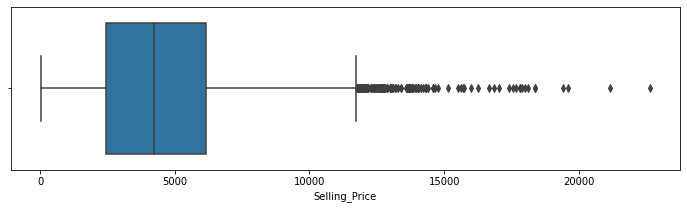

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='Selling_Price', data=train)

In [ ]:
train.shape

(6313, 25)

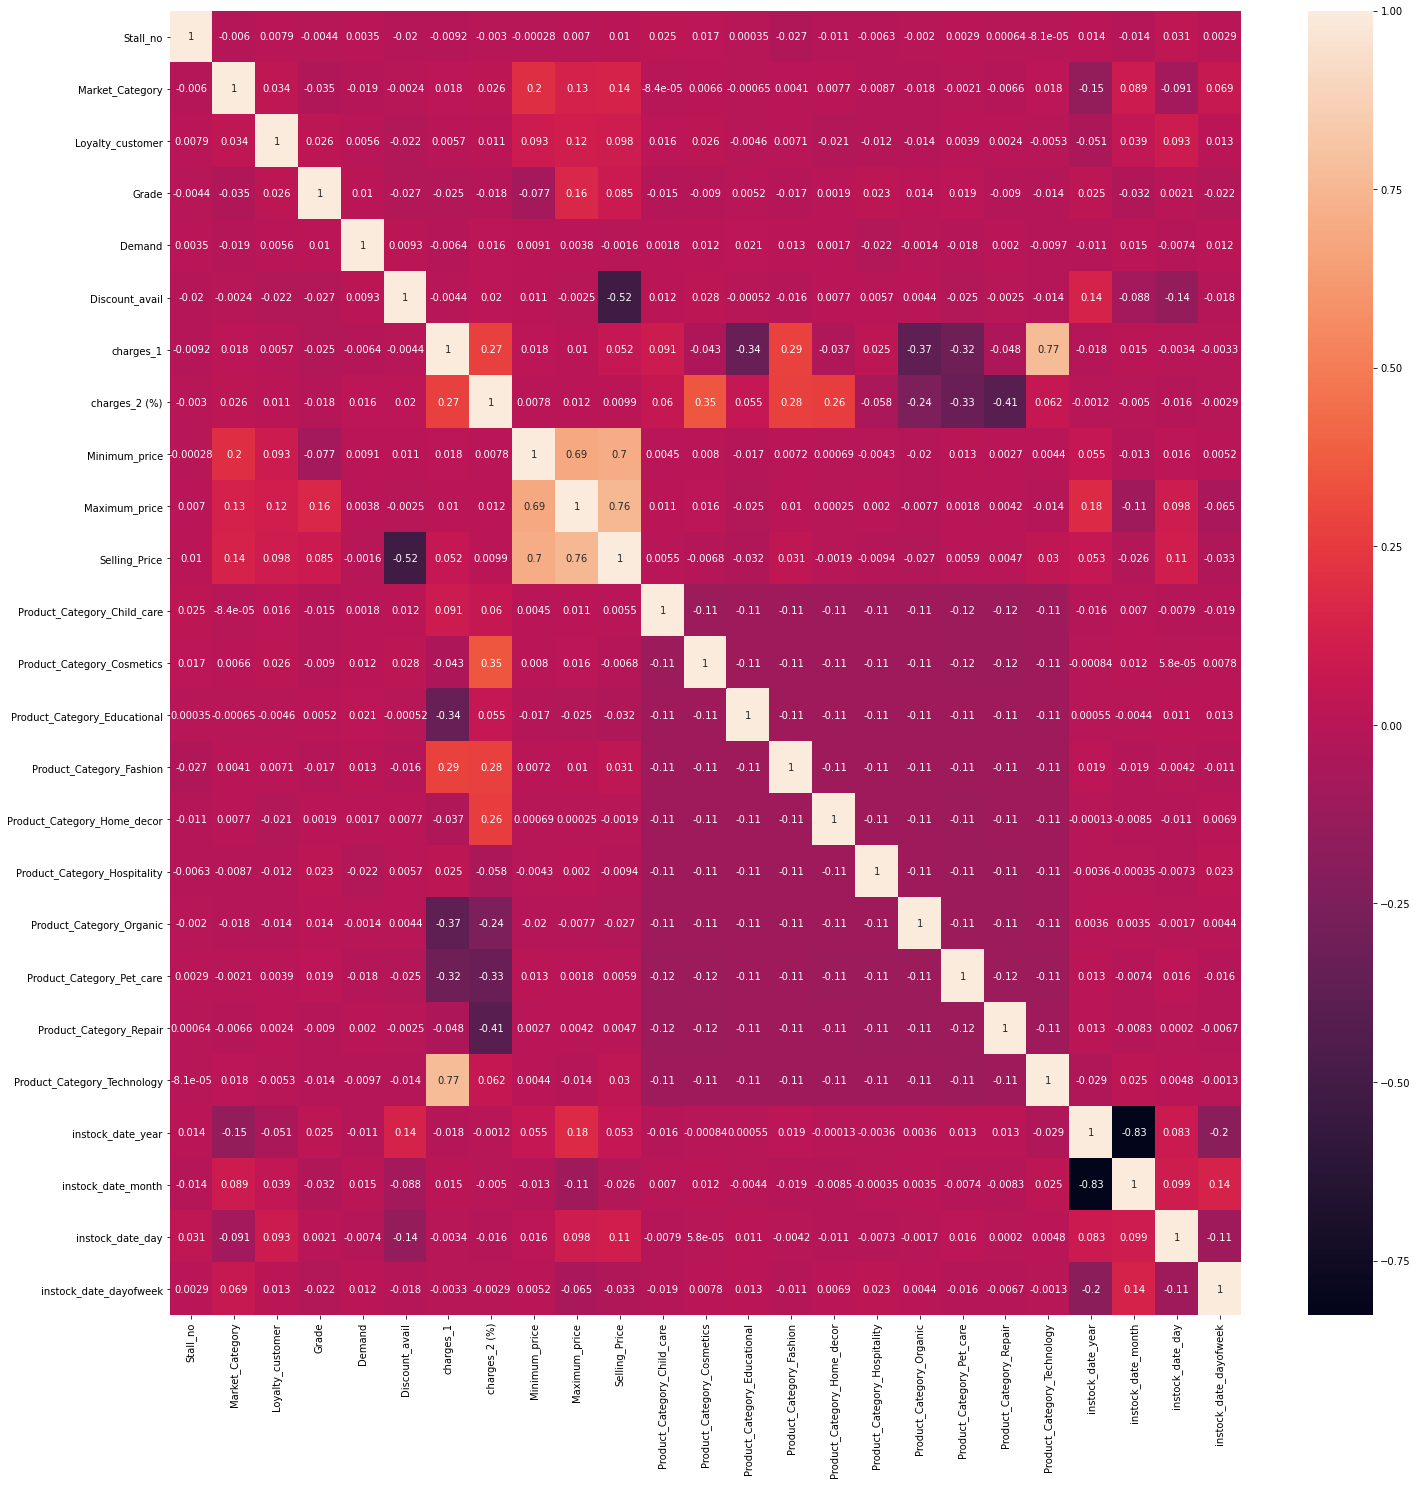

In [ ]:
import seaborn as sns
plt.subplots(figsize = (24,24))
sns.heatmap(train.corr(),annot=True)


In [ ]:
train.columns

Index(['Stall_no', 'Market_Category', 'Loyalty_customer', 'Grade', 'Demand',
       'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price',
       'Maximum_price', 'Selling_Price', 'Product_Category_Child_care',
       'Product_Category_Cosmetics', 'Product_Category_Educational',
       'Product_Category_Fashion', 'Product_Category_Home_decor',
       'Product_Category_Hospitality', 'Product_Category_Organic',
       'Product_Category_Pet_care', 'Product_Category_Repair',
       'Product_Category_Technology', 'instock_date_year',
       'instock_date_month', 'instock_date_day', 'instock_date_dayofweek'],
      dtype='object')

In [ ]:
cat_col = ['Loyalty_customer','Discount_avail']

In [ ]:
# Remove stall_No , Market_Category , Demand
col=['Loyalty_customer', 'Grade','Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price',
     'Maximum_price','Product_Category_Child_care','Product_Category_Cosmetics', 'Product_Category_Educational','Product_Category_Fashion',
     'Product_Category_Home_decor','Product_Category_Hospitality', 'Product_Category_Organic','Product_Category_Pet_care', 
     'Product_Category_Repair','Product_Category_Technology', 'instock_date_year','instock_date_month', 'instock_date_day', 
     'instock_date_dayofweek']

x=train[col]

y=train['Selling_Price']

In [ ]:
print(x.shape , y.shape )

(6313, 21) (6313,)


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 150303 ,shuffle=True)

In [ ]:
print(x_train.shape,x_test.shape)

(4419, 21) (1894, 21)


**Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 46.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
rfc = RandomForestRegressor(n_estimators = 1800, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = None, bootstrap = True)
rfc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predrfc = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error as msle
print(np.sqrt(msle(y_test,predrfc)))

0.09132522683823123


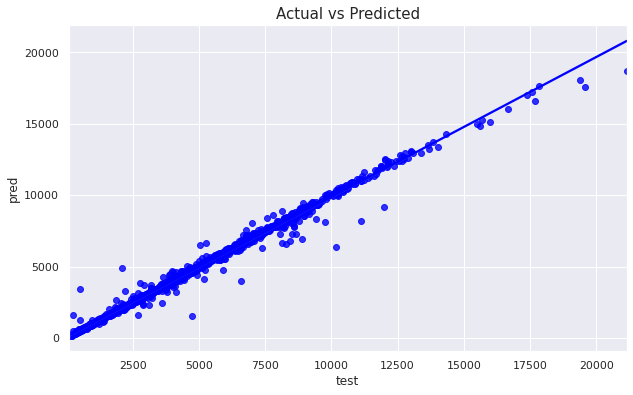

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = train, x = y_test , y = predrfc, ci = 68,color = "blue")
plt.xlabel("test", fontsize = 12)
plt.ylabel("pred", fontsize = 12 )
_= plt.title("Actual vs Predicted", fontsize = 15)

**Light GBM**

In [ ]:
print(x_train.shape , y_train.shape)

(4419, 21) (4419,)


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

lgbc = LGBMRegressor(max_depth=8, n_estimators=1000)
lgbc= lgbc.fit(x_train,y_train,categorical_feature=cat_col,eval_set=(x_test, y_test),verbose=100,early_stopping_rounds=100)

predlgb = lgbc.predict(x_test)
np.sqrt(msle(y_test,predlgb))

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Discount_avail', 'Loyalty_customer']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 89576.2
[200]	valid_0's l2: 89538.2
Early stopping, best iteration is:
[169]	valid_0's l2: 88386.2


0.09651429138817418

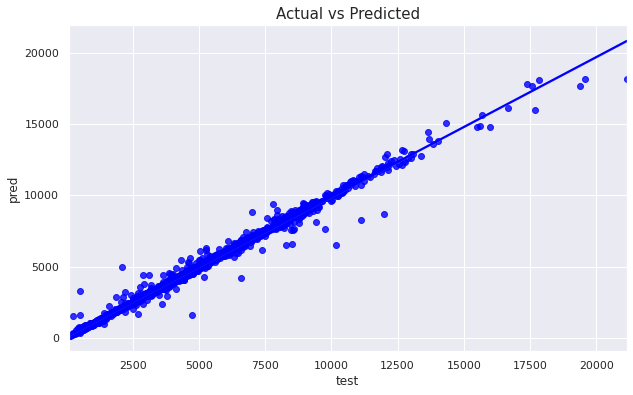

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = train, x = y_test , y = predlgb,ci = 68,color = "blue")
plt.xlabel("test", fontsize = 12)
plt.ylabel("pred", fontsize = 12 )
_= plt.title("Actual vs Predicted", fontsize = 15)

**Testing Data**

In [ ]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [ ]:
test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [ ]:
del test["Product_id"]
del test["Customer_name"]
del test["Stall_no"]

In [ ]:
#test["Stall_no"].fillna(13.0 , inplace=True)

test["Loyalty_customer"] = le.fit_transform(test["Loyalty_customer"])

In [ ]:
test["charges_1"] = test["charges_1"].fillna(test.groupby(['Product_Category','Loyalty_customer'])['charges_1'].transform('mean')) 
test["charges_2 (%)"] = test["charges_2 (%)"].fillna(test.groupby(['Product_Category',"Loyalty_customer"])['charges_2 (%)'].transform('mean')) 

In [ ]:
test["Minimum_price"].fillna(test["Minimum_price"].mean() , inplace = True)

In [ ]:
test = pd.get_dummies(test, columns = ['Product_Category'])

In [ ]:
test["instock_date"] = pd.to_datetime(test["instock_date"])

In [ ]:
test["instock_date_year"] = test["instock_date"].dt.year
test["instock_date_month"] = test["instock_date"].dt.month
#test["instock_date_week"] = test["instock_date"].dt.week
test["instock_date_day"] = test["instock_date"].dt.day
#test["instock_date_hour"] = test["instock_date"].dt.hour
#test["instock_date_minute"] = test["instock_date"].dt.minute
test["instock_date_dayofweek"] = test["instock_date"].dt.dayofweek

In [ ]:
del test["instock_date"]

In [ ]:
del test["Market_Category"]
del test["Demand"]

In [ ]:
print(test.shape)

(3430, 21)


In [ ]:
#Random Forest Prediction
pred1 = rfc.predict(test)
pred1 = np.round(pred1,6)

In [ ]:
#LightGBM Prediction
pred2 = lgbc.predict(test)
pred2 = np.round(pred2,6)

In [ ]:
pred1[pred1<0]

array([], dtype=float64)

In [ ]:
pred2[pred2<0]

array([], dtype=float64)

In [ ]:
sub = sub[['Product_id']]
sub["Selling_Price"] = (0.9 * pred1 + 0.1 *pred2)

In [ ]:
sub.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3283.732342
1,ACCEGCATKHNRXUHW,1940.725635
2,NKCE6GJ5XVJDXNNZ,11642.513393
3,NKCEB8BK3ZXDHDHM,9417.172668
4,TOPEFDXSAHRNPF94,5663.908638


In [ ]:
sub.to_csv('subfinalhai1.csv',index=False)
#from IPython.display import FileLink
#FileLink(r'sub.csv')